# <span style='color:#ac00be'> Projet Python : TAXIS NYC  </span>

## <span style='color:#ac00be'> Contexte  </span>

Une société de gestion de taxi nous a contacté afin d’analyser leurs données du mois de mars 2023. La société souhaite améliorer sa compétitivité sur le marché et voudrait mettre en place un outil d’estimation du montant des courses à destination des utilisateurs. 

## <span style='color:#ac00be'> Packages  </span>

In [1]:
import pyarrow.parquet as pq #pour importer un fichier parquet
from pandas.api.types import is_numeric_dtype #connaitre le type d'une variable
import matplotlib.pyplot as plt #pour faire des graphiques
import seaborn as sns #pour faire des graphiques
import pandas as pd
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## <span style='color:#ac00be'> Importation des données  </span>

In [2]:
data = pq.read_table('yellow_tripdata_2023-03.parquet')
data = data.to_pandas()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


## <span style='color:#dc2eca'> PARTIE 01 : Exploration des données  </span>

### <span style='color:#dc2eca'> 1.1 Analyse statistique  </span>

In [3]:
print("Description des colonnes numériques : \n")
for col in data:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Moyenne = %.2f' % data[col].mean())
        print('\t Ecart-Type = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

Description des colonnes numériques : 

VendorID:
	 Moyenne = 1.73
	 Ecart-Type = 0.46
	 Minimum = 1.00
	 Maximum = 6.00
passenger_count:
	 Moyenne = 1.35
	 Ecart-Type = 0.89
	 Minimum = 0.00
	 Maximum = 9.00
trip_distance:
	 Moyenne = 3.90
	 Ecart-Type = 191.69
	 Minimum = 0.00
	 Maximum = 216986.96
RatecodeID:
	 Moyenne = 1.62
	 Ecart-Type = 7.36
	 Minimum = 1.00
	 Maximum = 99.00
PULocationID:
	 Moyenne = 165.45
	 Ecart-Type = 63.74
	 Minimum = 1.00
	 Maximum = 265.00
DOLocationID:
	 Moyenne = 164.10
	 Ecart-Type = 69.67
	 Minimum = 1.00
	 Maximum = 265.00
payment_type:
	 Moyenne = 1.19
	 Ecart-Type = 0.53
	 Minimum = 0.00
	 Maximum = 5.00
fare_amount:
	 Moyenne = 18.91
	 Ecart-Type = 18.26
	 Minimum = -959.90
	 Maximum = 2100.00
extra:
	 Moyenne = 1.63
	 Ecart-Type = 1.84
	 Minimum = -7.50
	 Maximum = 13.75
mta_tax:
	 Moyenne = 0.49
	 Ecart-Type = 0.10
	 Minimum = -0.50
	 Maximum = 4.00
tip_amount:
	 Moyenne = 3.50
	 Ecart-Type = 4.00
	 Minimum = -80.00
	 Maximum = 984.30
tolls_amo

Matrice de corrélation

AxesSubplot(0.125,0.125;0.62x0.755)


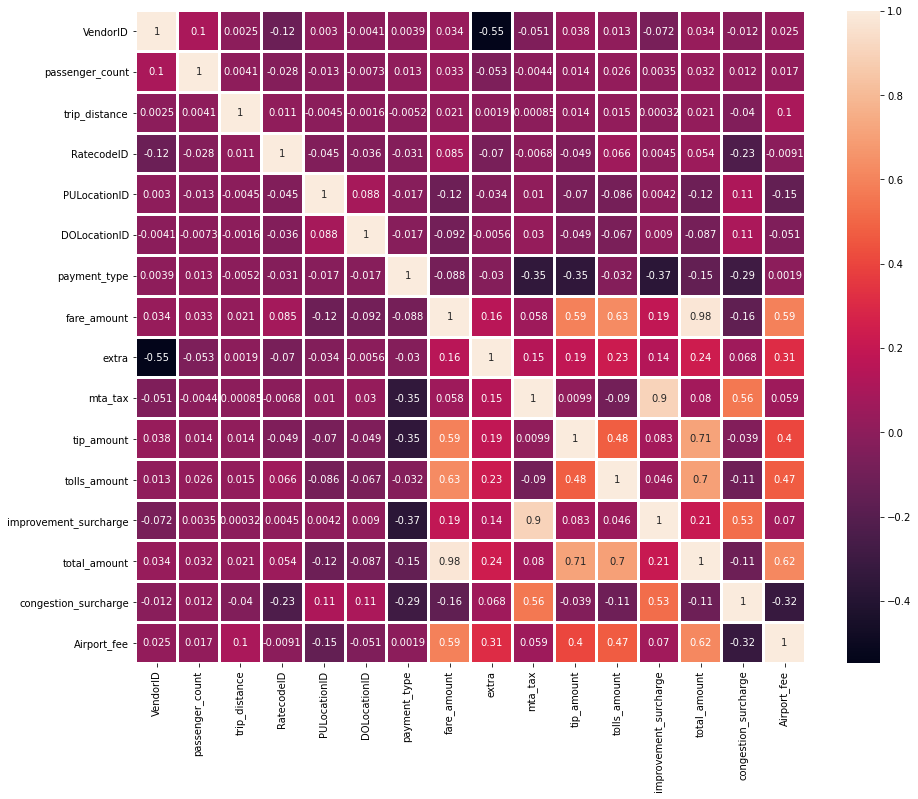

In [4]:
print("Matrice de corrélation\n")
corr1=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,12)) 
print(sns.heatmap(corr1, annot=True,linewidths=2,ax=ax))

### <span style='color:#dc2eca'> 1.2 Visualisation des données  </span>

(array([5.836500e+04, 2.526148e+06, 4.791420e+05, 1.178050e+05,
        5.901300e+04, 4.648200e+04, 2.917100e+04, 7.000000e+00,
        1.100000e+01, 3.000000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

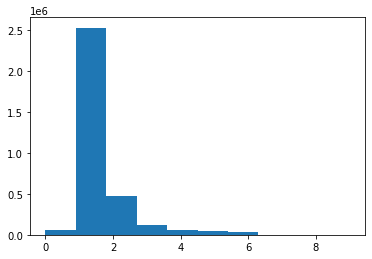

In [5]:
plt.hist(data["passenger_count"])

Text(0.5, 1.0, 'Distance de trajet par rapport au prix')

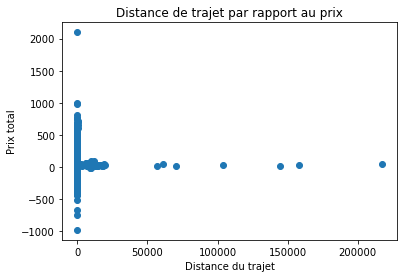

In [6]:
plt.scatter(data["trip_distance"],data["total_amount"])
plt.xlabel("Distance du trajet")
plt.ylabel("Prix total")
plt.title("Distance de trajet par rapport au prix")

On voit ici qu'on a des prix négatifs, des courses de taxis de plus de 50 000 miles facturés à environ 0 dollar ...
On supprimera ces lignes lors du traitement des données

## <span style='color:#883ff9'> PARTIE 02 : Prétraitement des données  </span>

In [7]:
print('Nombre d\'instance = %d' % (data.shape[0]))
print('Nombre d\'attributes = %d' % (data.shape[1]))

Nombre d'instance = 3403766
Nombre d'attributes = 19


### <span style='color:#883ff9'> 2.1 Valeurs manquantes  </span>

In [8]:
#Nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne : \n")
print(data.isnull().sum())

Nombre de valeurs manquantes par colonne : 

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          87619
trip_distance                0
RatecodeID               87619
store_and_fwd_flag       87619
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     87619
Airport_fee              87619
dtype: int64


In [9]:
#Supprimer les lignes qui contiennent des valeurs manquantes
data=data.dropna()

In [10]:
#Vérifier qu'il n'y a plus de valeurs manquantes
print(data.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


###  <span style='color:#883ff9'> 2.2 Colonnes supprimés  </span>

In [11]:
#Retirer les colonnes qui permettent de calculer le montant total
data=data.drop(['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee'],axis=1)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,28.05
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


### <span style='color:#883ff9'> 2.3 Lignes en doubles  </span>

In [12]:
#Vérifier qu'il n'y a pas de valeurs en doubles
dups = data.duplicated()
print('Nombre de lignes en double = %d' % (dups.sum()))

Nombre de lignes en double = 0


### <span style='color:#883ff9'> 2.4 Valeurs aberrantes  </span>

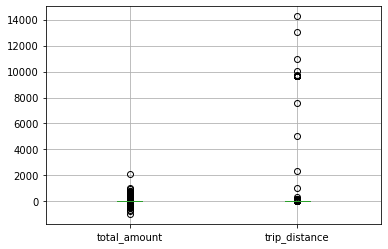

In [13]:
data.boxplot(column=['total_amount', 'trip_distance'])
# Afficher le graphique
plt.show()

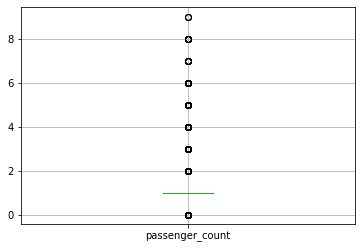

In [14]:
data.boxplot(column=['passenger_count'])
# Afficher le graphique
plt.show()

In [15]:
#Nombre de lignes où il n'y a pas de passager
data[data["passenger_count"]==0].count()

VendorID                 58365
tpep_pickup_datetime     58365
tpep_dropoff_datetime    58365
passenger_count          58365
trip_distance            58365
RatecodeID               58365
store_and_fwd_flag       58365
PULocationID             58365
DOLocationID             58365
payment_type             58365
total_amount             58365
dtype: int64

In [16]:
#Supprimer les lignes où il n'y a pas de passager
data = data.drop(data[data["passenger_count"]==0].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [17]:
data.shape

(3257782, 11)

### <span style='color:#883ff9'> 2.5 Lignes supprimés  </span>

In [18]:
#Afficher le nombre de total_amount négatifs
data[data["total_amount"]<0].count()

VendorID                 29709
tpep_pickup_datetime     29709
tpep_dropoff_datetime    29709
passenger_count          29709
trip_distance            29709
RatecodeID               29709
store_and_fwd_flag       29709
PULocationID             29709
DOLocationID             29709
payment_type             29709
total_amount             29709
dtype: int64

In [19]:
#Supprimer les lignes où le total_amount est négatif
data = data.drop(data[data['total_amount'] < 0].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [20]:
#Supprimer les lignes où le prix facturés par rapport à la distance est incohérente 
data = data.drop(data[data['trip_distance'] > 1000].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [21]:
#Supprimer les lignes où le prix facturés par rapport à la distance est incohérente 
data = data.drop(data[data['total_amount'] >= 1000].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,11.10
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [22]:
#Supprimer les lignes où la distance de voyage est incohérente 
data = data.drop(data[data['trip_distance'] <= 0.1].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [23]:
data=data.drop(data[data['trip_distance']>2000].index)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50
...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70


In [24]:
#Distance de trajet max
print("Distance de trajet maximal : ",max(data['trip_distance'])," miles")

Distance de trajet maximal :  290.59  miles


In [25]:
#Distance de trajet min
print("Distance de trajet minimal : ",min(data['trip_distance']), "miles")

Distance de trajet minimal :  0.11 miles


In [26]:
data.shape

(3181607, 11)

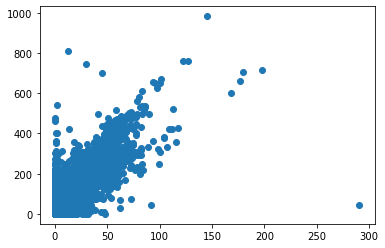

In [27]:
plt.scatter(data["trip_distance"],data["total_amount"])

## <span style='color:#3f77f9'> PARTIE 03 : Préparation des données  </span>


### <span style='color:#3f77f9'> 3.1 Création de colonnes  </span>


In [28]:
#On crée une colonne avec le numero du jour de la semaine
#pour le jour début de course
data['Tpep_pickup_jour']=data['tpep_pickup_datetime'].dt.dayofweek
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49,2
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70,2
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64,2
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00,2
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68,4
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12,4
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72,4
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70,4


In [29]:
#On crée une colonne qui stocke l'heure de début de la course
data['tpep_pickup_heure']=data['tpep_pickup_datetime'].dt.time

# Convertir la colonne en type chaîne de caractères
data['tpep_pickup_heure'] = data['tpep_pickup_heure'].astype(str)

# Extraire uniquement la partie 'HH'
data['tpep_pickup_heure'] = data['tpep_pickup_heure'].str[:2]

type(pd.to_numeric(data['tpep_pickup_heure']).astype(int))

pandas.core.series.Series

In [30]:
data['tpep_pickup_heure']=data.tpep_pickup_heure.apply(int)-0

In [31]:
#On crée une colonne qui stocke le numéro de jour de la date de la
#fin de la course
data['tpep_dropoff_jour']=data['tpep_dropoff_datetime'].dt.dayofweek 
#On crée une colonne avec l'heure de fin de course
data['tpep_dropoff_heure']=data['tpep_dropoff_datetime'].dt.time
# Convertir la colonne en type chaîne de caractères
data['tpep_dropoff_heure'] = data['tpep_dropoff_heure'].astype(str)

# Extraire uniquement la partie 'HH'
data['tpep_dropoff_heure'] = data['tpep_dropoff_heure'].str[:2]

data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour,tpep_pickup_heure,tpep_dropoff_jour,tpep_dropoff_heure
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49,2,0,2,00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70,2,0,2,01
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64,2,0,2,00
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00,2,0,2,00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50,2,0,2,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68,4,23,5,00
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12,4,23,4,23
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72,4,23,4,23
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70,4,23,4,23


In [32]:
data['tpep_dropoff_heure']=data.tpep_dropoff_heure.apply(int)-0

In [33]:
#On crée une colonne qui stocke la durée de la course
data['Temps_Trajet']=data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour,tpep_pickup_heure,tpep_dropoff_jour,tpep_dropoff_heure,Temps_Trajet
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49,2,0,2,0,0 days 00:31:05
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70,2,0,2,1,0 days 00:11:28
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64,2,0,2,0,0 days 00:03:02
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00,2,0,2,0,0 days 00:08:25
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50,2,0,2,0,0 days 00:09:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68,4,23,5,0,0 days 00:08:01
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12,4,23,4,23,0 days 00:02:45
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72,4,23,4,23,0 days 00:16:54
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70,4,23,4,23,0 days 00:08:45


In [34]:
# Conversion de la colonne en un type de données compatible avec les opérations de temps
data['Temps_Trajet2'] = pd.to_timedelta(data['Temps_Trajet'])

In [35]:
data['Temps_Trajet_minutes']=((data['Temps_Trajet2'].dt.components['hours'])*60) + data['Temps_Trajet2'].dt.components['minutes'] + ((data['Temps_Trajet2'].dt.components['seconds'])/60)

In [36]:
data.drop(["Temps_Trajet","Temps_Trajet2"],axis=1,inplace=True)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour,tpep_pickup_heure,tpep_dropoff_jour,tpep_dropoff_heure,Temps_Trajet_minutes
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,76.49,2,0,2,0,31.083333
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,24.70,2,0,2,1,11.466667
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,14.64,2,0,2,0,3.033333
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,18.00,2,0,2,0,8.416667
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,20.50,2,0,2,0,9.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,19.68,4,23,5,0,8.016667
3316143,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,12.12,4,23,4,23,2.750000
3316144,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,24.72,4,23,4,23,16.900000
3316145,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,17.70,4,23,4,23,8.750000


In [37]:
#suppression des colonnes tpep_pickup_datetime / tpep_dropoff_datetime
data = data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour,tpep_pickup_heure,tpep_dropoff_jour,tpep_dropoff_heure,Temps_Trajet_minutes
1,2,2.0,12.40,1.0,N,138,231,1,76.49,2,0,2,0,31.083333
3,1,1.0,2.90,1.0,N,140,43,1,24.70,2,0,2,1,11.466667
4,2,1.0,1.23,1.0,N,79,137,1,14.64,2,0,2,0,3.033333
5,1,1.0,1.20,1.0,N,162,137,1,18.00,2,0,2,0,8.416667
6,1,1.0,1.80,1.0,N,170,48,1,20.50,2,0,2,0,9.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,1.0,2.01,1.0,N,236,142,1,19.68,4,23,5,0,8.016667
3316143,2,1.0,0.36,1.0,N,48,48,1,12.12,4,23,4,23,2.750000
3316144,2,3.0,1.68,1.0,N,68,114,1,24.72,4,23,4,23,16.900000
3316145,2,1.0,1.50,1.0,N,114,137,1,17.70,4,23,4,23,8.750000


###  <span style='color:#3f77f9'> 3.2 Suppression de certaines colonnes  </span>

Nous avons décidé de supprimer certaines colonnes qui ne sont pas impliquées dans le calcul du montant. Par exemple, la colonne "store_and_fwd_flag" n'a pas d'impacte sur le prix de la course

In [38]:
data.drop('store_and_fwd_flag',axis=1,inplace=True)
data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,Tpep_pickup_jour,tpep_pickup_heure,tpep_dropoff_jour,tpep_dropoff_heure,Temps_Trajet_minutes
1,2,2.0,12.40,1.0,138,231,1,76.49,2,0,2,0,31.083333
3,1,1.0,2.90,1.0,140,43,1,24.70,2,0,2,1,11.466667
4,2,1.0,1.23,1.0,79,137,1,14.64,2,0,2,0,3.033333
5,1,1.0,1.20,1.0,162,137,1,18.00,2,0,2,0,8.416667
6,1,1.0,1.80,1.0,170,48,1,20.50,2,0,2,0,9.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316142,2,1.0,2.01,1.0,236,142,1,19.68,4,23,5,0,8.016667
3316143,2,1.0,0.36,1.0,48,48,1,12.12,4,23,4,23,2.750000
3316144,2,3.0,1.68,1.0,68,114,1,24.72,4,23,4,23,16.900000
3316145,2,1.0,1.50,1.0,114,137,1,17.70,4,23,4,23,8.750000


## <span style='color:#60d6f9'> PARTIE 04 : Top model 👸👑🏰 </span>


### <span style='color:#60d6f9'> 4.1 Régression Linéaire </span>

In [39]:
#Diviser les données et la variable à prédire
X = data.drop('total_amount',axis=1)
y = data['total_amount']

from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [40]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred=np.round(lm.predict(X_test),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(X_train), y_train))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  6.785408515539325
Train RMSE for Linear Regression is  6.769349889907264
Variance for Linear Regression is  0.016058625632060952


In [42]:
#Méthode sklearn
from sklearn.metrics import r2_score
y_train_predict = lm.predict(X_train)
y_test_predict = lm.predict(X_test)
r2 = r2_score(y_train, y_train_predict)
print("R2 (en %) : ",r2*100)

R2 (en %) :  90.56617905409874


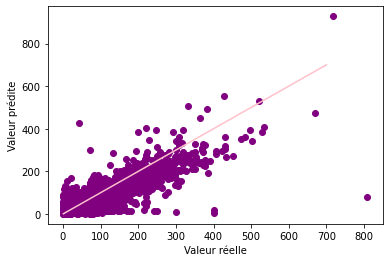

In [43]:
plt.scatter(y_test,y_test_predict, color='purple')
plt.plot([1,700], [1,700] , color='pink')   
plt.xlabel('Valeur réelle')
plt.ylabel('Valeur prédite')
plt.show()

### <span style='color:#60d6f9'> 4.2 Random Forest </span>

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
#Diviser les données et la variable à prédire
#X = data.drop('total_amount',axis=1)
#y = data['total_amount']

# Normalisation des données
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)

In [46]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
rf = RandomForestRegressor(n_estimators = 10,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_train_predict = rf.predict(X_train)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
print("RMSE for Random Forest is ",rf_rmse)

RMSE for Random Forest is  3.574567132245703


In [48]:
r2 = r2_score(y_test, rf_pred)
print("R2 (en %) : ",r2*100)

R2 (en %) :  97.35600876364305


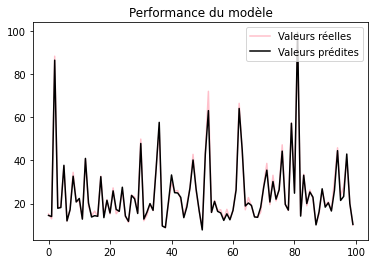

In [49]:
plt.title('Performance du modèle')
plt.plot(list(y_test[:100]),label='Valeurs réelles', color='pink')
plt.plot(list(rf_pred[:100]),label='Valeurs prédites',color="black")
plt.legend(loc=1)

### <span style='color:#60d6f9'> 4.3 XGBoost </span>

In [50]:
#Diviser les données et la variable à prédire
#X = data.drop('total_amount',axis=1)
#y = data['total_amount']

In [51]:
# Diviser les données en ensembles d'apprentissage et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
xgb_model = XGBRegressor(n_estimators=30)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

In [54]:
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

Train r2 score:  0.9633394304810828
Test r2 score:  0.9674972583432704


In [55]:
res=[]
N = list(range(10,101,10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for i in range (10,101,10):
    xgb_model = XGBRegressor(n_estimators=i)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    y_train_pred = xgb_model.predict(X_train)
    y_pred = xgb_model.predict(X_test)
    res1=r2_score(y_test, y_pred)
    res.append(res1)

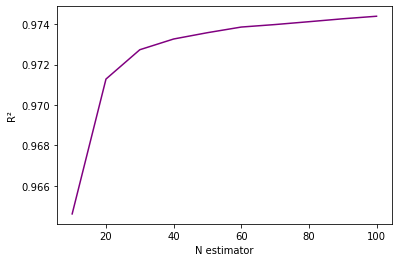

In [56]:
N = list(range(10,101,10))
fig, ax = plt.subplots()
ax.plot(N, res, color="purple")
plt.xlabel("N estimator")
plt.ylabel("R²")
plt.show()

On remarque ici que la courbe est croissante puis se stabilise entre 0.958 et 0.960. Nous allons donc choisir un n qui permet d'obtenir un bon score en mettant le moins de temps à s'exécuter. Nous allons prendre n=30.